In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader,TensorDataset
import seaborn as sns
from scipy import stats

/tmp/ipykernel_9235/1818514666.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [12]:
iris=sns.load_dataset('iris')
data=iris.drop(columns=['species'])
data=data.apply(stats.zscore)
data=data.values
data=torch.tensor(data).float()

labels=torch.zeros(len(data),dtype=torch.long)
labels[iris.species=='versicolor']=1
labels[iris.species=='virginica']=2


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
data, labels, test_size=0.2, random_state=42)
train_data=TensorDataset(X_train,y_train) 
test_data=TensorDataset(X_test,y_test)
bs=4
train_loader=DataLoader(train_data,batch_size=bs,shuffle=True,drop_last=True)
test_loader=DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])

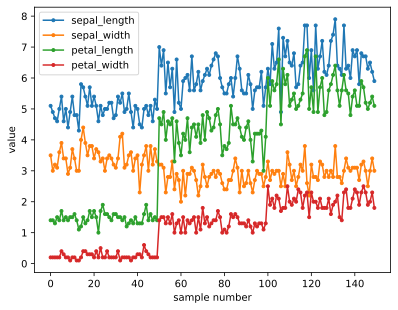

In [14]:
iris.plot(marker='.')
plt.xlabel('sample number')
plt.ylabel('value')
plt.show()

In [5]:
for X,y in train_loader:
    print(X.shape,y.shape)

torch.Size([4, 4]) torch.Size([4])
torch.Size([4, 4]) torch.Size([4])
torch.Size([4, 4]) torch.Size([4])
torch.Size([4, 4]) torch.Size([4])
torch.Size([4, 4]) torch.Size([4])
torch.Size([4, 4]) torch.Size([4])
torch.Size([4, 4]) torch.Size([4])
torch.Size([4, 4]) torch.Size([4])
torch.Size([4, 4]) torch.Size([4])
torch.Size([4, 4]) torch.Size([4])
torch.Size([4, 4]) torch.Size([4])
torch.Size([4, 4]) torch.Size([4])
torch.Size([4, 4]) torch.Size([4])
torch.Size([4, 4]) torch.Size([4])
torch.Size([4, 4]) torch.Size([4])
torch.Size([4, 4]) torch.Size([4])
torch.Size([4, 4]) torch.Size([4])
torch.Size([4, 4]) torch.Size([4])
torch.Size([4, 4]) torch.Size([4])
torch.Size([4, 4]) torch.Size([4])
torch.Size([4, 4]) torch.Size([4])
torch.Size([4, 4]) torch.Size([4])
torch.Size([4, 4]) torch.Size([4])
torch.Size([4, 4]) torch.Size([4])
torch.Size([4, 4]) torch.Size([4])
torch.Size([4, 4]) torch.Size([4])
torch.Size([4, 4]) torch.Size([4])
torch.Size([4, 4]) torch.Size([4])
torch.Size([4, 4]) t

In [15]:
def createANNmodel():
    ANNiris=nn.Sequential(nn.Linear(4,64),
                         nn.ReLU(),
                         nn.Linear(64,64),
                         nn.ReLU(),

                         nn.Linear(64,3),   
                         )
    lossfun=nn.CrossEntropyLoss()
    optimizer=torch.optim.SGD(ANNiris.parameters(),lr=0.005)
    return ANNiris,lossfun,optimizer

In [16]:
numepochs=500
def trainModel():
    trainAcc=[]
    testAcc=[]
    losses=[]
    for epochi in range(numepochs):
        batchAcc=[]
        batchLoss=[]
        for X,y in train_loader:
            yHat=ANNiris(X)
            loss=lossfun(yHat,y)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            batchAcc.append(100*torch.mean((torch.argmax(yHat,axis=1)==y).float()).item())
            batchLoss.append(loss.item())
            
        trainAcc.append(np.mean(batchAcc))
        losses.append(np.mean(batchLoss))
        
        X,y=next(iter(test_loader))
        predlabels=torch.argmax(ANNiris(X),axis=1)
        testAcc.append(100*torch.mean((predlabels==y).float()).item())
    return trainAcc,testAcc,losses
            

In [17]:
ANNiris,lossfun,optimizer=createANNmodel()
trainAcc,testAcc,losses=trainModel()

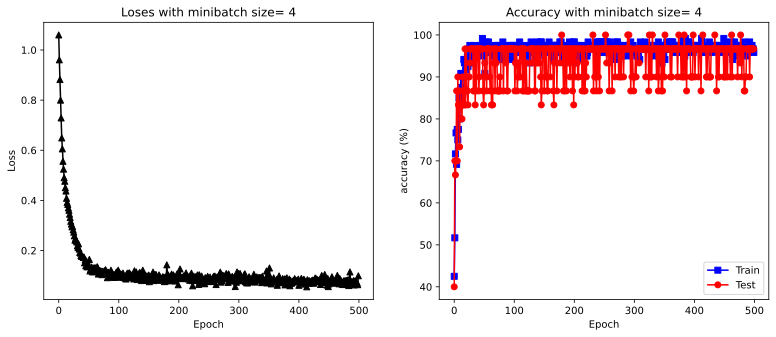

In [9]:
fig,ax=plt.subplots(1,2,figsize=(13,5))
ax[0].plot(losses,'k^-')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_title('Loses with minibatch size= ' + str(bs))



ax[1].plot(trainAcc,'bs-')
ax[1].plot(testAcc,'ro-')

ax[1].set_ylabel('accuracy (%)')
ax[1].set_xlabel('Epoch')
ax[1].set_title('Accuracy with minibatch size= ' + str(bs))
ax[1].legend(['Train','Test'])
# without zscore

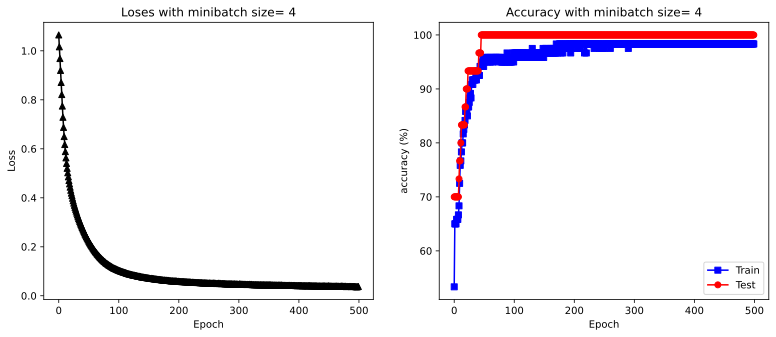

In [18]:
fig,ax=plt.subplots(1,2,figsize=(13,5))
ax[0].plot(losses,'k^-')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_title('Loses with minibatch size= ' + str(bs))



ax[1].plot(trainAcc,'bs-')
ax[1].plot(testAcc,'ro-')

ax[1].set_ylabel('accuracy (%)')
ax[1].set_xlabel('Epoch')
ax[1].set_title('Accuracy with minibatch size= ' + str(bs))
ax[1].legend(['Train','Test'])
# with zscore